In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'\Users\nesto\OneDrive\Desktop\datasets\mall.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


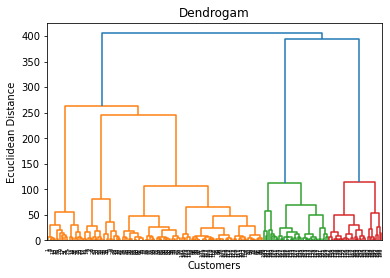

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

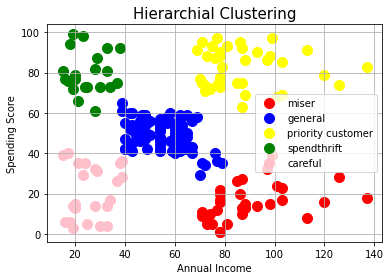

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [11]:
#Text Analysis and Topic Modelling
papers  = pd.read_csv(r'\Users\nesto\OneDrive\Desktop\datasets\papers.csv')

In [12]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [13]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
5838,2016,Stochastic Gradient Geodesic MCMC Methods,We propose two stochastic gradient MCMC method...,Stochastic Gradient Geodesic MCMC Methods\n\n?...
5885,2016,Local Maxima in the Likelihood of Gaussian Mix...,We provide two fundamental results on the popu...,Local Maxima in the Likelihood of Gaussian Mix...
4983,2014,Feature Cross-Substitution in Adversarial Clas...,"The success of machine learning, particularly ...",Feature Cross-Substitution in Adversarial\nCla...
1672,1989,Can Simple Cells Learn Curves? A Hebbian Model...,Abstract Missing,Can Simple Cells Learn Curves? A Hebbian Model...
65,1995,When is an Integrate-and-fire Neuron like a Po...,Abstract Missing,When is an Integrate-and-fire Neuron\nlike a P...


In [14]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

5838    stochastic gradient geodesic mcmc methods\n\n\...
5885    local maxima in the likelihood of gaussian mix...
4983    feature cross-substitution in adversarial\ncla...
1672    can simple cells learn curves a hebbian model ...
65      when is an integrate-and-fire neuron\nlike a p...
Name: paper_text_processed, dtype: object

In [15]:
pip install wordcloud

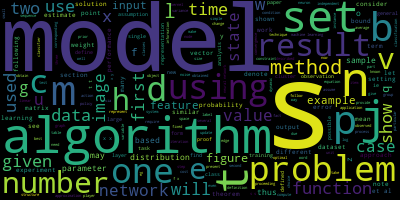

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nesto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['stochastic', 'gradient', 'geodesic', 'mcmc', 'methods', 'chang', 'liu', 'jun', 'zhu', 'yang', 'song', 'dept', 'comp', 'sci', 'tech', 'tnlist', 'lab', 'center', 'bio', 'inspired', 'computing', 'research', 'state', 'key', 'lab', 'intell', 'tech', 'systems', 'tsinghua', 'university']


In [18]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 4), (17, 2), (18, 3), (19, 1), (20, 1), (21, 4), (22, 4), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [19]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"model" + 0.006*"algorithm" + 0.005*"function" + 0.005*"learning" + '
  '0.004*"data" + 0.004*"set" + 0.004*"one" + 0.003*"number" + 0.003*"using" + '
  '0.003*"training"'),
 (1,
  '0.006*"algorithm" + 0.006*"learning" + 0.005*"set" + 0.004*"function" + '
  '0.004*"model" + 0.004*"data" + 0.003*"time" + 0.003*"one" + 0.003*"using" + '
  '0.003*"number"'),
 (2,
  '0.006*"model" + 0.005*"data" + 0.005*"learning" + 0.005*"algorithm" + '
  '0.005*"function" + 0.004*"one" + 0.004*"set" + 0.004*"error" + '
  '0.004*"problem" + 0.004*"number"'),
 (3,
  '0.007*"learning" + 0.005*"algorithm" + 0.005*"set" + 0.005*"model" + '
  '0.005*"function" + 0.004*"data" + 0.003*"one" + 0.003*"error" + '
  '0.003*"results" + 0.003*"using"'),
 (4,
  '0.005*"model" + 0.005*"learning" + 0.005*"algorithm" + 0.004*"data" + '
  '0.004*"set" + 0.003*"time" + 0.003*"information" + 0.003*"function" + '
  '0.003*"using" + 0.003*"problem"'),
 (5,
  '0.007*"model" + 0.005*"set" + 0.005*"function" + 0.005

In [20]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=d62f41d4605fb664cc76ba683b4fb24c18e4a6da155433ea568da9d4ac9537f5
  Stored in directory: c:\users\nesto\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ba67bebd69e73a714b9a83e91604d309de2d1309271b33aaf6e92729a6164aec
  Stored in directory: c:\users\nesto\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully

In [21]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [22]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\nesto\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.006490  0.003127       1        1  16.224479
8      0.004051  0.000667       2        1  14.871811
6      0.000725  0.004864       3        1  13.739180
5      0.008082 -0.000084       4        1  12.719824
2     -0.001877  0.004595       5        1   9.954230
9     -0.003966 -0.003120       6        1   9.527171
1     -0.000763 -0.001443       7        1   8.143579
3     -0.001786 -0.004675       8        1   7.873997
0      0.001884  0.001204       9        1   6.233696
4      0.000141 -0.005135      10        1   0.712032, topic_info=              Term         Freq        Total Category  logprob  loglift
620          model  1164.000000  1164.000000  Default  30.0000  30.0000
551       learning  1157.000000  1157.000000  Default  29.0000  29.0000
34       algorithm  1117.000000  1117.000000  Default  28.0000  28.0000
226           data  1122.000000  1122.000000  Default  27.0000  27.0000
845            set  1136.000000  1136.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1007           two     3.935555   698.209754  Topic10  -6.0631  -0.2337
642         neural     3.509294   549.844718  Topic10  -6.1777  -0.1094
279   distribution     3.149974   502.809193  Topic10  -6.2857  -0.1280
373         figure     3.194983   597.993089  Topic10  -6.2715  -0.2872
993       training     3.170050   593.876391  Topic10  -6.2794  -0.2881

[899 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11132      1  0.088835  accelerator
11132      2  0.133253  accelerator
11132      3  0.266506  accelerator
11132      4  0.177671  accelerator
11132      5  0.088835  accelerator
...      ...       ...          ...
2371       3  0.137497          zaj
2371       4  0.137497          zaj
2371       5  0.137497          zaj
2371       6  0.274995          zaj
2371       9  0.137497          zaj

[4130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 7, 6, 3, 10, 2, 4, 1, 5])